### Data Mining and Machine Learning
### Random Forest using scikit-learn and h2o
#### Datasets: Diabetes and Landsat
#### Edgar Acuna
#### Abril 2021

In [23]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
import warnings
warnings.filterwarnings('ignore')
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,1 hour 40 mins
H2O_cluster_timezone:,America/La_Paz
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_eacun_3dprm9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.683 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### I- Applying Random Forest to Diabetes using H20. 

In [24]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,nfolds=10,max_depth=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print ((y_pred['predict']==diabetes['C9']).mean())

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
[0.96875]


In [25]:
model.model_performance(diabetes)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04324466905704127
RMSE: 0.2079535261952566
LogLoss: 0.18937240694242896
Mean Per-Class Error: 0.011194029850746245
AUC: 0.9993134328358209
AUCPR: 0.9988280242017832
Gini: 0.9986268656716417

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5079356427490711: 


,,1,2,Error,Rate
0,1,500.0,0.0,0.0,(0.0/500.0)
1,2,6.0,262.0,0.0224,(6.0/268.0)
2,Total,506.0,262.0,0.0078,(6.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.507936,0.988679,177.0
1,max f2,0.428330,0.985130,187.0
2,max f0point5,0.507936,0.995441,177.0
3,max accuracy,0.507936,0.992188,177.0
4,max precision,0.995455,1.000000,0.0
5,max recall,0.313346,1.000000,216.0
6,max specificity,0.995455,1.000000,0.0
7,max absolute_mcc,0.507936,0.982863,177.0
8,max min_per_class_accuracy,0.444121,0.985075,183.0
9,max mean_per_class_accuracy,0.507936,0.988806,177.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 35.11 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.976220,2.865672,2.865672,1.000000,0.982790,1.000000,0.982790,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,0.964087,2.865672,2.865672,1.000000,0.970491,1.000000,0.976641,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,0.945600,2.865672,2.865672,1.000000,0.953822,1.000000,0.969034,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,0.932427,2.865672,2.865672,1.000000,0.938038,1.000000,0.962035,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,0.927652,2.865672,2.865672,1.000000,0.930457,1.000000,0.955557,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,0.868873,2.865672,2.865672,1.000000,0.900510,1.000000,0.928391,0.141791,0.287313,186.567164,186.567164,0.287313
6,7,0.151042,0.822439,2.865672,2.865672,1.000000,0.846838,1.000000,0.900972,0.145522,0.432836,186.567164,186.567164,0.432836
7,8,0.200521,0.759028,2.865672,2.865672,1.000000,0.789659,1.000000,0.873506,0.141791,0.574627,186.567164,186.567164,0.574627
8,9,0.300781,0.594499,2.865672,2.865672,1.000000,0.686170,1.000000,0.811060,0.287313,0.861940,186.567164,186.567164,0.861940
9,10,0.399740,0.323176,1.357423,2.492294,0.473684,0.457356,0.869707,0.723498,0.134328,0.996269,35.742341,149.229423,0.916269


### Showing the confusion matrix including the accuracy estimated by out-of-bag and Cross-validation

In [4]:
#Mostrando la matrix de confusion para estimar la precision out-of-bag y por validacion crizada
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1618348179474_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,66771.0,10.0,10.0,10.0,80.0,128.0,101.5




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16131494373530655
RMSE: 0.40164031637188335
LogLoss: 0.4955163232190502
Mean Per-Class Error: 0.2454477611940299
AUC: 0.8211417910447761
AUCPR: 0.6978302122596751
Gini: 0.6422835820895523

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4580936187082898: 


,,1,2,Error,Rate
0,1,415.0,85.0,0.17,(85.0/500.0)
1,2,86.0,182.0,0.3209,(86.0/268.0)
2,Total,501.0,267.0,0.2227,(171.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.458094,0.680374,172.0
1,max f2,0.146481,0.785848,312.0
2,max f0point5,0.542050,0.692884,134.0
3,max accuracy,0.458094,0.777344,172.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.001524,1.000000,398.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.458094,0.509548,172.0
8,max min_per_class_accuracy,0.369758,0.742000,207.0
9,max mean_per_class_accuracy,0.458094,0.754552,172.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.929063,2.149254,2.149254,0.750000,0.965926,0.750000,0.965926,0.022388,0.022388,114.925373,114.925373,0.018388
1,2,0.020833,0.901311,2.865672,2.507463,1.000000,0.911948,0.875000,0.938937,0.029851,0.052239,186.567164,150.746269,0.048239
2,3,0.031250,0.890824,2.149254,2.388060,0.750000,0.896966,0.833333,0.924946,0.022388,0.074627,114.925373,138.805970,0.066627
3,4,0.040365,0.870034,2.046908,2.311026,0.714286,0.878335,0.806452,0.914421,0.018657,0.093284,104.690832,131.102552,0.081284
4,5,0.050781,0.848849,2.149254,2.277842,0.750000,0.860700,0.794872,0.903401,0.022388,0.115672,114.925373,127.784156,0.099672
5,6,0.100260,0.774452,2.413197,2.344640,0.842105,0.810116,0.818182,0.857365,0.119403,0.235075,141.319717,134.464043,0.207075
6,7,0.151042,0.694372,2.057405,2.248070,0.717949,0.730696,0.784483,0.814778,0.104478,0.339552,105.740528,124.806999,0.289552
7,8,0.200521,0.627893,1.960723,2.177166,0.684211,0.660184,0.759740,0.776631,0.097015,0.436567,96.072270,117.716612,0.362567
8,9,0.300781,0.505901,1.637527,1.997286,0.571429,0.560322,0.696970,0.704528,0.164179,0.600746,63.752665,99.728630,0.460746
9,10,0.399740,0.397486,1.206599,1.801546,0.421053,0.452131,0.628664,0.642045,0.119403,0.720149,20.659859,80.154602,0.492149




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.15487433000880704
RMSE: 0.39354076028895285
LogLoss: 0.4719333158248081
Mean Per-Class Error: 0.22555223880597008
AUC: 0.8382835820895523
AUCPR: 0.6985496907530415
Gini: 0.6765671641791047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3542147514224052: 


,,1,2,Error,Rate
0,1,364.0,136.0,0.272,(136.0/500.0)
1,2,48.0,220.0,0.1791,(48.0/268.0)
2,Total,412.0,356.0,0.2396,(184.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.354215,0.705128,218.0
1,max f2,0.246628,0.802387,262.0
2,max f0point5,0.552134,0.680970,133.0
3,max accuracy,0.409556,0.772135,194.0
4,max precision,0.863556,0.863636,21.0
5,max recall,0.034226,1.000000,378.0
6,max specificity,0.980000,0.998000,0.0
7,max absolute_mcc,0.354215,0.524649,218.0
8,max min_per_class_accuracy,0.395606,0.768000,200.0
9,max mean_per_class_accuracy,0.354215,0.774448,218.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 35.14 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.903674,2.149254,2.149254,0.750000,0.938021,0.750000,0.938021,0.022388,0.022388,114.925373,114.925373,0.018388
1,2,0.020833,0.876863,2.507463,2.328358,0.875000,0.890675,0.812500,0.914348,0.026119,0.048507,150.746269,132.835821,0.042507
2,3,0.031250,0.855093,2.507463,2.388060,0.875000,0.866347,0.833333,0.898348,0.026119,0.074627,150.746269,138.805970,0.066627
3,4,0.040365,0.842034,2.456290,2.403467,0.857143,0.848510,0.838710,0.887094,0.022388,0.097015,145.628998,140.346654,0.087015
4,5,0.050781,0.815650,2.149254,2.351320,0.750000,0.829415,0.820513,0.875262,0.022388,0.119403,114.925373,135.132032,0.105403
5,6,0.100260,0.744759,2.337785,2.344640,0.815789,0.781491,0.818182,0.828985,0.115672,0.235075,133.778476,134.464043,0.207075
6,7,0.151042,0.682262,2.130884,2.272774,0.743590,0.714214,0.793103,0.790398,0.108209,0.343284,113.088404,127.277406,0.295284
7,8,0.200521,0.624851,1.809898,2.158558,0.631579,0.647679,0.753247,0.755182,0.089552,0.432836,80.989788,115.855786,0.356836
8,9,0.300781,0.511114,1.600310,1.972475,0.558442,0.566212,0.688312,0.692192,0.160448,0.593284,60.031014,97.247529,0.449284
9,10,0.399740,0.413628,1.470542,1.848218,0.513158,0.455683,0.644951,0.633643,0.145522,0.738806,47.054203,84.821819,0.520806




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.80770797,0.05303614,0.72289157,0.8023256,0.85714287,0.77272725,0.84615386,0.8243243,0.82758623,0.88235295,0.8153846,0.72619045
1,auc,0.84385026,0.045831688,0.79034394,0.8547742,0.8157025,0.7717391,0.8687747,0.83630955,0.89215684,0.92673993,0.8370098,0.8449519
2,aucpr,0.7153658,0.111968026,0.646886,0.7906082,0.6767743,0.49620172,0.6530744,0.7914955,0.8483297,0.8567797,0.64719427,0.74631464
3,err,0.19229203,0.05303614,0.27710843,0.19767442,0.14285715,0.22727273,0.15384616,0.17567568,0.1724138,0.11764706,0.18461539,0.27380952
4,err_count,14.9,4.9317565,23.0,17.0,11.0,15.0,12.0,13.0,15.0,8.0,12.0,23.0
5,f0point5,0.71711135,0.08714455,0.5882353,0.7253886,0.7777778,0.625,0.7692308,0.8108108,0.7638889,0.8333333,0.64220184,0.6352459
6,f1,0.7405603,0.06260278,0.6567164,0.7671233,0.71794873,0.68085104,0.7,0.78688526,0.8148148,0.8518519,0.7,0.7294118
7,f2,0.77478725,0.08046639,0.7432432,0.81395346,0.6666667,0.74766356,0.64220184,0.7643312,0.8730159,0.8712121,0.7692308,0.8563536
8,lift_top_group,2.2973216,1.3018275,3.074074,2.6060605,3.5,0.0,0.0,2.3125,2.4166667,2.6153846,3.8235295,2.625
9,logloss,0.4726683,0.052898966,0.5068344,0.45890287,0.4697275,0.5669723,0.45628336,0.5457162,0.43229768,0.39333585,0.43803236,0.45858043



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-04-13 17:09:56,3.567 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-13 17:09:56,3.581 sec,1.0,0.492693,7.139265,0.718643,0.517702,1.665188,0.266667
2,,2021-04-13 17:09:56,3.596 sec,2.0,0.502993,6.968847,0.688718,0.541155,1.784286,0.307203
3,,2021-04-13 17:09:56,3.615 sec,3.0,0.494899,5.874016,0.698728,0.549961,1.794393,0.326389
4,,2021-04-13 17:09:56,3.627 sec,4.0,0.470350,4.676703,0.736803,0.587585,1.927815,0.295490
5,,2021-04-13 17:09:56,3.640 sec,5.0,0.459942,4.049986,0.746030,0.592770,1.920295,0.286541
6,,2021-04-13 17:09:56,3.655 sec,6.0,0.448598,3.329716,0.761675,0.613334,1.976325,0.301676
7,,2021-04-13 17:09:56,3.665 sec,7.0,0.448621,3.284892,0.759976,0.608043,1.910448,0.266216
8,,2021-04-13 17:09:56,3.678 sec,8.0,0.450042,3.121211,0.755563,0.602171,1.885310,0.271638
9,,2021-04-13 17:09:57,3.698 sec,9.0,0.442802,2.672100,0.767050,0.611633,1.881934,0.267550



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1375.648193,1.000000,0.279819
1,C6,769.212708,0.559164,0.156465
2,C8,759.207581,0.551891,0.154430
3,C7,520.340271,0.378251,0.105842
4,C1,469.462677,0.341267,0.095493
5,C5,364.893768,0.265252,0.074223
6,C3,356.472443,0.259131,0.072510
7,C4,300.964142,0.218780,0.061219


<bound method H2OBinomialModel.confusion_matrix of >

### Finding the importance of each feature

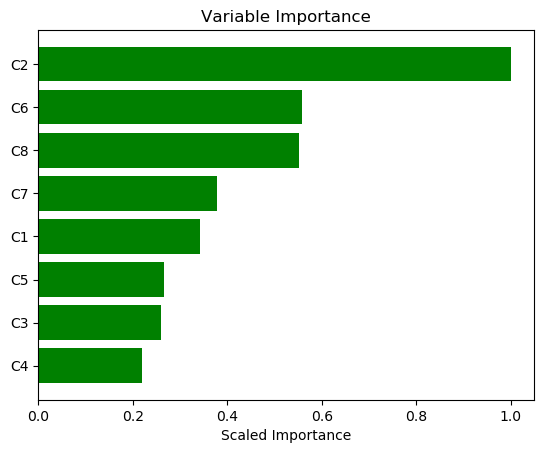

In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### According to  random Forest  the most important predictors are plas, age y mass

### II Random Forest  for Diabetes using scikit learn

In [6]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True,random_state=0)
clf.fit(X, y)
print("The accuracy estimated by resubstiution is", clf.score(X,y))

The accuracy estimated by resubstiution is 0.9869791666666666


#### Estimating the accuracy

In [7]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.97      0.98       268

    accuracy                           0.99       768
   macro avg       0.99      0.98      0.99       768
weighted avg       0.99      0.99      0.99       768



In [8]:
print(confusion_matrix(y,predictions))

[[499   1]
 [  9 259]]


#### Estimating the accuracy by cross-validation

In [9]:
from sklearn.model_selection import cross_val_score
rfmodel=clf.fit(X, y)
scores = cross_val_score(rfmodel, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.758 (+/- 0.095)


#### Estimating the accuracy by Out-of-Bag

In [10]:
#Tasa de precision usando out-of-Bag
print(clf.oob_score_)

0.7421875


#### Finding the most important features 

In [11]:
print(clf.feature_importances_)

[0.08178093 0.25522871 0.08433383 0.07064764 0.06914087 0.17326173
 0.12167218 0.14393411]


#### The most important features are the same as above:  plas, mass and age

### III. Random Forest para Landsat usando H2o

In [12]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print ((y_pred['predict']==datos['C37']).sum()/float(len(datos)))
model.model_performance(datos)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.9830890642615558

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.02659864900861265
RMSE: 0.1630909225205764
LogLoss: 0.11371736486365992
Mean Per-Class Error: 0.026327930470812777
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,Error,Rate
0,1072.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 1,072"
1,1.0,476.0,0.0,1.0,1.0,0.0,0.006263,3 / 479
2,1.0,0.0,960.0,0.0,0.0,0.0,0.001041,1 / 961
3,0.0,0.0,32.0,371.0,0.0,12.0,0.106024,44 / 415
4,10.0,0.0,0.0,1.0,454.0,5.0,0.034043,16 / 470
5,0.0,0.0,5.0,6.0,0.0,1027.0,0.010597,"11 / 1,038"
6,1084.0,476.0,997.0,379.0,455.0,1044.0,0.016911,"75 / 4,435"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.983089
1,2,0.999549
2,3,0.999549
3,4,1.000000
4,5,1.000000
5,6,1.000000


In [13]:
#Mostrando la matrix de confusion para estimar la precision out-of-bag y por validacion crizada
print(model.confusion_matrix)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1618348179474_1074


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,300.0,383910.0,9.0,10.0,9.996667,20.0,160.0,97.41333




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.08478697356730562
RMSE: 0.2911820282354418
LogLoss: 0.29226315779425566
Mean Per-Class Error: 0.1297922976998788
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,Error,Rate
0,1050.0,2.0,14.0,0.0,6.0,0.0,0.020522,"22 / 1,072"
1,1.0,462.0,2.0,5.0,6.0,3.0,0.035491,17 / 479
2,4.0,2.0,927.0,20.0,1.0,7.0,0.035380,34 / 961
3,5.0,2.0,87.0,235.0,5.0,81.0,0.433735,180 / 415
4,31.0,6.0,1.0,3.0,392.0,37.0,0.165957,78 / 470
5,0.0,2.0,19.0,55.0,15.0,947.0,0.087669,"91 / 1,038"
6,1091.0,476.0,1050.0,318.0,425.0,1075.0,0.095152,"422 / 4,435"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.904848
1,2,0.983089
2,3,0.995490
3,4,0.998196
4,5,0.998873
5,6,1.000000



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.084625641272297
RMSE: 0.29090486636063173
LogLoss: 0.2852570779550491
Mean Per-Class Error: 0.12873732896456455
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,Error,Rate
0,1051.0,2.0,13.0,0.0,6.0,0.0,0.019590,"21 / 1,072"
1,0.0,468.0,0.0,3.0,3.0,5.0,0.022965,11 / 479
2,5.0,1.0,924.0,20.0,1.0,10.0,0.038502,37 / 961
3,6.0,4.0,83.0,242.0,2.0,78.0,0.416867,173 / 415
4,38.0,5.0,0.0,5.0,384.0,38.0,0.182979,86 / 470
5,0.0,3.0,18.0,58.0,16.0,943.0,0.091522,"95 / 1,038"
6,1100.0,483.0,1038.0,328.0,412.0,1074.0,0.095378,"423 / 4,435"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.904622
1,2,0.984216
2,3,0.997069
3,4,0.998422
4,5,0.999549
5,6,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.90453833,0.0098782815,0.9028078,0.92045456,0.90375584,0.90401787,0.89376444,0.9097222,0.9164835,0.9061785,0.8865248,0.9016736
1,auc,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aucpr,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,err,0.09546168,0.0098782815,0.09719223,0.07954545,0.096244134,0.09598214,0.106235564,0.090277776,0.083516486,0.09382151,0.11347517,0.09832636
4,err_count,42.3,4.24395,45.0,35.0,41.0,43.0,46.0,39.0,38.0,41.0,48.0,47.0
5,logloss,0.2849505,0.03023953,0.33880615,0.24471608,0.26827186,0.27572048,0.2838379,0.25526202,0.3283523,0.295429,0.29392228,0.26518685
6,max_per_class_error,0.42086223,0.07100423,0.54761904,0.3478261,0.47058824,0.5121951,0.33333334,0.44117647,0.39215687,0.36734694,0.4117647,0.3846154
7,mean_per_class_accuracy,0.8718661,0.016289469,0.8600055,0.90223294,0.8717994,0.856273,0.86880153,0.8687392,0.8881454,0.8897983,0.85656434,0.85630137
8,mean_per_class_error,0.1281339,0.016289469,0.13999452,0.09776705,0.12820056,0.14372699,0.13119845,0.1312608,0.11185461,0.11020172,0.14343564,0.14369866
9,mse,0.084653676,0.0052263346,0.08437757,0.07541372,0.08346302,0.08626818,0.08917372,0.078486264,0.081781544,0.09154147,0.09114531,0.08488599



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2021-04-13 17:10:27,13.447 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2021-04-13 17:10:27,13.478 sec,1.0,0.397637,4.386101,0.177696,NaN,NaN
2,,2021-04-13 17:10:27,13.508 sec,2.0,0.376918,3.708833,0.160855,NaN,NaN
3,,2021-04-13 17:10:27,13.531 sec,3.0,0.370822,3.187559,0.161641,NaN,NaN
4,,2021-04-13 17:10:27,13.547 sec,4.0,0.361448,2.815495,0.152741,NaN,NaN
5,,2021-04-13 17:10:27,13.557 sec,5.0,0.352839,2.485394,0.147324,NaN,NaN
6,,2021-04-13 17:10:27,13.577 sec,6.0,0.344385,2.108998,0.140486,NaN,NaN
7,,2021-04-13 17:10:27,13.599 sec,7.0,0.340520,1.893706,0.137485,NaN,NaN
8,,2021-04-13 17:10:27,13.623 sec,8.0,0.333240,1.645403,0.131835,NaN,NaN
9,,2021-04-13 17:10:27,13.650 sec,9.0,0.326001,1.369125,0.126751,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C18,9145.593750,1.000000,0.070452
1,C22,8117.669922,0.887604,0.062534
2,C17,6893.150391,0.753713,0.053101
3,C20,6327.915039,0.691909,0.048747
4,C33,5774.547363,0.631402,0.044484
5,C24,5250.671387,0.574120,0.040448
6,C6,5075.188477,0.554933,0.039096
7,C5,5040.767578,0.551169,0.038831
8,C29,4993.281250,0.545977,0.038465
9,C14,4743.293945,0.518643,0.036540



See the whole table with table.as_data_frame()
<bound method H2OMultinomialModel.confusion_matrix of >


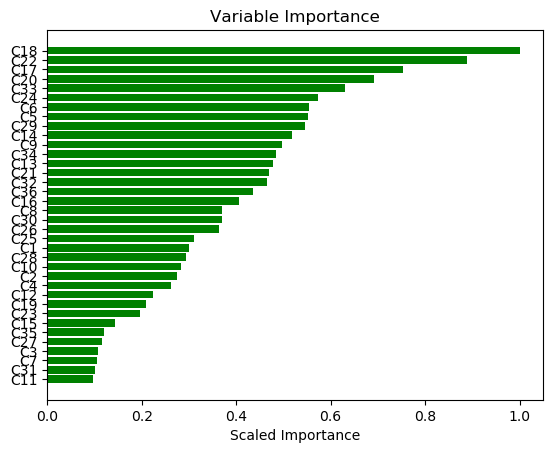

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### The six   most important features are: c18, c17, c22, c21, c24 y c20

### IV. Random Forest para Landsat usando Scikit-Learn

In [16]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_csv(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True, random_state=0)
clf.fit(X, y)
print("la Precision estimada es", clf.score(X,y))

la Precision estimada es 0.97271702367531


In [17]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1072
           1       1.00      1.00      1.00       479
           2       0.95      1.00      0.97       961
           3       0.98      0.80      0.88       415
           4       1.00      0.93      0.97       470
           5       0.96      0.99      0.98      1038

    accuracy                           0.97      4435
   macro avg       0.98      0.96      0.97      4435
weighted avg       0.97      0.97      0.97      4435



In [18]:
#Estimacion del error usando out-of-bag
print(clf.oob_score_)

0.8985343855693348


In [19]:
a=clf.feature_importances_
print(np.argsort(a))

[26 10 30 34  6  2  7  3 22  0  9 35  8  1 14 11 25 29  5 27 18 28 23 32
 15 12  4 31 33 13 21 24 19 20 17 16]


#### The six most important features are: 17, 18, 21, 20, 25 y 22

### V. Applying Random Forest   to the adult dataset which contains missing values 

In [20]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print ((y_pred['predict']==datos['C15']).sum()/float(len(datos)))
model.model_performance(datos)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.9416172721967998

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04843944209678157
RMSE: 0.22008962287391373
LogLoss: 0.16930768007823516
Mean Per-Class Error: 0.05795822535184525
AUC: 0.986319052433293
AUCPR: 0.9581229981881385
Gini: 0.972638104866586

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4121219068534416: 


,,<=50K,>50K,Error,Rate
0,<=50K,23640.0,1080.0,0.0437,(1080.0/24720.0)
1,>50K,731.0,7110.0,0.0932,(731.0/7841.0)
2,Total,24371.0,8190.0,0.0556,(1811.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.412122,0.887031,204.0
1,max f2,0.302011,0.924591,243.0
2,max f0point5,0.559579,0.899317,155.0
3,max accuracy,0.442197,0.944627,194.0
4,max precision,0.999643,1.000000,0.0
5,max recall,0.101961,1.000000,327.0
6,max specificity,0.999643,1.000000,0.0
7,max absolute_mcc,0.412122,0.850519,204.0
8,max min_per_class_accuracy,0.360947,0.938633,221.0
9,max mean_per_class_accuracy,0.314965,0.942042,238.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010012,0.997885,4.152659,4.152659,1.000000,0.999341,1.000000,0.999341,0.041576,0.041576,315.265910,315.265910,0.041576
1,2,0.020024,0.991881,4.152659,4.152659,1.000000,0.995219,1.000000,0.997280,0.041576,0.083153,315.265910,315.265910,0.083153
2,3,0.030005,0.985003,4.152659,4.152659,1.000000,0.988619,1.000000,0.994399,0.041449,0.124601,315.265910,315.265910,0.124601
3,4,0.040017,0.972486,4.152659,4.152659,1.000000,0.979611,1.000000,0.990699,0.041576,0.166178,315.265910,315.265910,0.166178
4,5,0.050029,0.955476,4.152659,4.152659,1.000000,0.965144,1.000000,0.985585,0.041576,0.207754,315.265910,315.265910,0.207754
5,6,0.100028,0.812035,4.127151,4.139909,0.993857,0.881888,0.996930,0.933753,0.206351,0.414105,312.715137,313.990915,0.413701
6,7,0.150026,0.688587,3.838914,4.039598,0.924447,0.751070,0.972774,0.872871,0.191940,0.606045,283.891397,303.959796,0.600665
7,8,0.200025,0.557498,3.425689,3.886144,0.824939,0.624323,0.935821,0.810743,0.171279,0.777324,242.568868,288.614421,0.760415
8,9,0.300021,0.304206,1.927109,3.233199,0.464066,0.421418,0.778585,0.680982,0.192705,0.970029,92.710931,223.319942,0.882529
9,10,0.400018,0.149406,0.281860,2.495421,0.067875,0.221671,0.600921,0.566163,0.028185,0.998215,-71.813954,149.542133,0.787939


In [21]:
print(model.confusion_matrix)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1618348179474_1075


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,2826420.0,20.0,20.0,20.0,1668.0,2648.0,2166.96




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09540920217532994
RMSE: 0.3088838004417356
LogLoss: 0.3249993858514067
Mean Per-Class Error: 0.17159359162629095
AUC: 0.9148267998600007
AUCPR: 0.801841974208222
Gini: 0.8296535997200014

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38537505169818603: 


,,<=50K,>50K,Error,Rate
0,<=50K,22058.0,2662.0,0.1077,(2662.0/24720.0)
1,>50K,2031.0,5810.0,0.259,(2031.0/7841.0)
2,Total,24089.0,8472.0,0.1441,(4693.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.385375,0.712315,211.0
1,max f2,0.153845,0.792479,309.0
2,max f0point5,0.623362,0.744634,129.0
3,max accuracy,0.512645,0.864316,164.0
4,max precision,0.988162,0.998590,6.0
5,max recall,0.000008,1.000000,399.0
6,max specificity,0.999972,0.999960,0.0
7,max absolute_mcc,0.428833,0.618537,193.0
8,max min_per_class_accuracy,0.287771,0.826254,252.0
9,max mean_per_class_accuracy,0.275697,0.828406,257.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.43 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010012,0.999358,4.139921,4.139921,0.996933,0.999983,0.996933,0.999983,0.041449,0.041449,313.992088,313.992088,0.041408
1,2,0.020024,0.989930,4.152659,4.146290,1.000000,0.995961,0.998466,0.997972,0.041576,0.083025,315.265910,314.628999,0.082985
2,3,0.030282,0.969697,4.102927,4.131601,0.988024,0.978415,0.994929,0.991347,0.042086,0.125112,310.292666,313.160099,0.124909
3,4,0.040017,0.944682,4.126459,4.130350,0.993691,0.957892,0.994628,0.983208,0.040173,0.165285,312.645936,313.035011,0.165002
4,5,0.050029,0.913408,3.999800,4.104224,0.963190,0.929577,0.988336,0.972475,0.040046,0.205331,299.980048,310.422416,0.204562
5,6,0.100028,0.766535,3.446095,3.775261,0.829853,0.837540,0.909119,0.905028,0.172299,0.377630,244.609487,277.526054,0.365656
6,7,0.150026,0.626221,2.844112,3.464941,0.684889,0.696689,0.834391,0.835596,0.142201,0.519832,184.411234,246.494135,0.487105
7,8,0.200025,0.504593,2.265087,3.165024,0.545455,0.563524,0.762168,0.767589,0.113251,0.633083,126.508678,216.502376,0.570421
8,9,0.300021,0.328710,1.594233,2.641481,0.383907,0.406817,0.636094,0.647344,0.159418,0.792501,59.423338,164.148057,0.648690
9,10,0.400018,0.200514,1.015208,2.234944,0.244472,0.263387,0.538196,0.551362,0.101518,0.894019,1.520781,123.494359,0.650693




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.09472336259303007
RMSE: 0.30777160784099317
LogLoss: 0.30633749893588436
Mean Per-Class Error: 0.169851540157557
AUC: 0.9166081177934093
AUCPR: 0.8048959024273852
Gini: 0.8332162355868187

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41360043366300936: 


,,<=50K,>50K,Error,Rate
0,<=50K,22403.0,2317.0,0.0937,(2317.0/24720.0)
1,>50K,2208.0,5633.0,0.2816,(2208.0/7841.0)
2,Total,24611.0,7950.0,0.139,(4525.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.413600,0.713444,192.0
1,max f2,0.146582,0.793256,306.0
2,max f0point5,0.583433,0.746261,131.0
3,max accuracy,0.487394,0.866282,165.0
4,max precision,0.999722,1.000000,0.0
5,max recall,0.000029,1.000000,399.0
6,max specificity,0.999722,1.000000,0.0
7,max absolute_mcc,0.443397,0.622802,181.0
8,max min_per_class_accuracy,0.291282,0.827828,242.0
9,max mean_per_class_accuracy,0.243790,0.830148,263.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.44 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010012,0.994779,4.152659,4.152659,1.000000,0.998032,1.000000,0.998032,0.041576,0.041576,315.265910,315.265910,0.041576
1,2,0.020024,0.983295,4.139921,4.146290,0.996933,0.989204,0.998466,0.993618,0.041449,0.083025,313.992088,314.628999,0.082985
2,3,0.030005,0.966040,4.139882,4.144158,0.996923,0.975002,0.997953,0.987425,0.041321,0.124346,313.988169,314.415826,0.124265
3,4,0.040017,0.940658,4.038015,4.117602,0.972393,0.954513,0.991558,0.979191,0.040429,0.164775,303.801514,311.760212,0.164330
4,5,0.050029,0.907500,3.923371,4.078732,0.944785,0.924237,0.982198,0.968194,0.039281,0.204056,292.337117,307.873208,0.202882
5,6,0.100028,0.764523,3.499661,3.789285,0.842752,0.833109,0.912496,0.900672,0.174978,0.379033,249.966111,278.928549,0.367504
6,7,0.150026,0.621015,2.795648,3.458141,0.673219,0.693001,0.832753,0.831462,0.139778,0.518811,179.564765,245.814068,0.485761
7,8,0.200025,0.500977,2.336508,3.177776,0.562654,0.559455,0.765239,0.763471,0.116822,0.635633,133.650844,217.777567,0.573780
8,9,0.300021,0.329511,1.586581,2.647432,0.382064,0.407400,0.637527,0.644793,0.158653,0.794286,58.658106,164.743176,0.651042
9,10,0.400018,0.201730,1.005005,2.236857,0.242015,0.264339,0.538656,0.549687,0.100497,0.894784,0.500472,123.685653,0.651701




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.856513,0.015547973,0.8426301,0.8705956,0.8722884,0.8343834,0.8395738,0.8753763,0.8560771,0.84490305,0.85641026,0.87289196
1,auc,0.9166579,0.0058473386,0.9181254,0.92577237,0.91969424,0.91015226,0.91298056,0.9222383,0.9116695,0.91152835,0.9111066,0.9233119
2,aucpr,0.8050725,0.013225432,0.8061873,0.81685245,0.80838114,0.7871837,0.7820193,0.82246006,0.7997456,0.8086135,0.7999762,0.81930566
3,err,0.143487,0.015547973,0.1573699,0.12940443,0.12771158,0.16561656,0.16042618,0.12462372,0.14392291,0.15509693,0.14358975,0.12710805
4,err_count,467.3,52.408756,505.0,415.0,418.0,552.0,527.0,414.0,463.0,496.0,476.0,407.0
5,f0point5,0.69902366,0.035139196,0.66374516,0.7259894,0.7258697,0.65256256,0.6516536,0.7436224,0.699527,0.6835586,0.70252866,0.7411796
6,f1,0.71740997,0.014984142,0.710933,0.73516273,0.7264398,0.70418006,0.69449276,0.7379747,0.7082546,0.7099415,0.7122128,0.7345075
7,f2,0.7383131,0.01655267,0.76534384,0.74457085,0.7270107,0.7646648,0.74336064,0.73241204,0.71720266,0.73844284,0.72216773,0.7279545
8,lift_top_group,4.153925,0.084887944,4.1675324,4.181226,4.289646,4.1148148,4.2773438,4.1525,4.140283,3.9975,4.1027226,4.115681
9,logloss,0.30624184,0.015032057,0.29587606,0.28374562,0.29895455,0.32168344,0.30219316,0.3009196,0.31576997,0.32125548,0.33001292,0.29200765



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-04-13 17:12:33,35.275 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-13 17:12:33,35.313 sec,1.0,0.373631,3.154451,0.821444,0.598599,2.850422,0.182369
2,,2021-04-13 17:12:33,35.365 sec,2.0,0.369704,2.825530,0.829391,0.617820,2.951620,0.183719
3,,2021-04-13 17:12:33,35.418 sec,3.0,0.364258,2.490871,0.837429,0.627130,3.007889,0.179751
4,,2021-04-13 17:12:33,35.496 sec,4.0,0.357314,2.117317,0.846370,0.649501,3.164366,0.175214
5,,2021-04-13 17:12:33,35.576 sec,5.0,0.352760,1.864372,0.851281,0.662569,3.267666,0.179419
6,,2021-04-13 17:12:33,35.654 sec,6.0,0.346757,1.609812,0.860116,0.681284,3.379803,0.174693
7,,2021-04-13 17:12:33,35.732 sec,7.0,0.343611,1.425427,0.864880,0.693011,3.468607,0.173694
8,,2021-04-13 17:12:33,35.812 sec,8.0,0.340229,1.251912,0.869625,0.705828,3.577005,0.170389
9,,2021-04-13 17:12:34,35.900 sec,9.0,0.336430,1.100976,0.875901,0.715765,3.638135,0.167437



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,52863.378906,1.000000,0.170470
1,C11,43545.523438,0.823737,0.140423
2,C6,34436.968750,0.651433,0.111050
3,C4,29942.441406,0.566412,0.096556
4,C1,29383.710938,0.555842,0.094755
5,C7,27391.863281,0.518163,0.088332
6,C13,18797.855469,0.355593,0.060618
7,C5,17887.171875,0.338366,0.057681
8,C3,17425.503906,0.329633,0.056193
9,C12,10945.434570,0.207051,0.035296


<bound method H2OBinomialModel.confusion_matrix of >


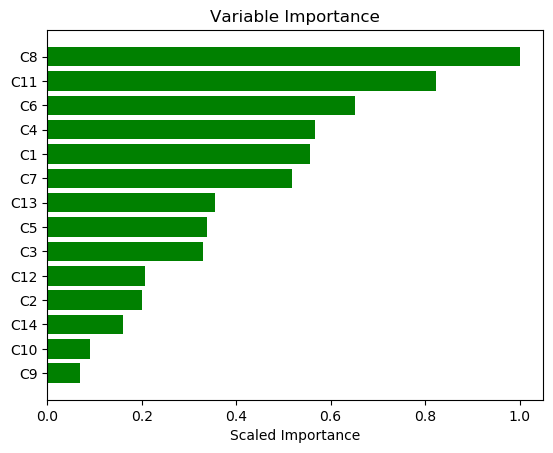

In [22]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()